# SyriaTel-Customer-Churn-Project

#### A machine learning project that uses the SyriaTel Customer Chun dataset. The Machine Learning model will help predict whether a SyriaTel Telecommunications customer is at risk of churning (stop doing business wit the company).The objective is to assist the company in recognizing customers who are at high risk of churning early, allowing them to implement measures to retain them.



# Business Understanding

#### Syriatel is looking for a reliable way to predict customers likely to churn so that the company can take correctve action. 
#### Failure to do this may lead to more operational costs being incurred through marketting to engage new customers due to a high churning of existing customers.
#### The findings of this project can be used by Syriatel Management and Marketting teams



# Data Understanding 

### Includes Loading Dataset and checking the overview of the Data itself

In [301]:
#import libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score


In [302]:
#load dataset
df = pd.read_csv("syratel_customer_churn.csv")
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [303]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [304]:
df.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

df.columns

# Data Preparation and Cleaning
### Starting with dropping missing values

In [305]:
df.dropna()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [306]:
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [307]:
#### Checking how many customers are likely to "churn" using the 'churn' column
#### 85.5%:14.5% ratio shows an existing imbalance in the distribution
#### This shows 85% dont churn, while 15% churn.
#### Hence Recall method will be used as an evaluation metric at the end

df['churn'].value_counts()
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [308]:
## The focus here is to drop irreliable columns
### i.e 'phone number' since this is unique to every customer & 'state' since it contains many variables and may complicate the model

df = df.drop(columns=['phone number', 'state'])


In [309]:
X_train.dtypes


account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [310]:
#Encoding categorical variables since ML only understands numbers, not text

df['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})
df['churn'] = df['churn'].astype(int)

In [311]:
### Define Features and Target
### X are the independent varibles (features)
### y is the target variable (predicting)
X = df.drop('churn', axis=1)
y = df['churn']

# Modeling

In [312]:
## Train-Test Split method
## Train on 80% Test on 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [313]:
# Scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   #Fitting only on training data to prevent data leakage
X_test_scaled = scaler.transform(X_test)

In [314]:
# Model 1: Logistic Regression Model



log_r= LogisticRegression(class_weight='balanced', max_iter=1000)
log_r.fit(X_train_scaled, y_train)

y_pred =log_r.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))

#### The results show a total of 667 customers. 570 customers did not churn, while 97 did churn. (Imbalanced)
#### Accuracy of 76% shows overall model performance  (This may not be very reliable because most customers did not churn)
### If model predicts 'No churn' its 94% almost always correct. However precision of 'churn' customers is low at 35%
### The model recall 73% of customers who actually churn 
#### The logistic regression model performs reasonably well overall, with an accuracy of 76%. It performs very well in identifying non-churn customers, and it achieves a high recall of 73% for churners, meaning most churn cases are detected.


              precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.35      0.73      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Test Recall: 0.7319587628865979


In [315]:
### Model 2: Decision Tree Model


tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
print("Test Recall:", recall_score(y_test, y_pred_tree))

#### The results show a total of 667 customers. 570 customers did not churn, while 97 did churn. (Imbalanced)
#### Accuracy of 90% shows overall model performance  (More reliable than logistic regression model)
#### Precision (65%), recall(66%) and f1-score(66%) makes this model reliable in identifying churn customers


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.65      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

Test Recall: 0.6597938144329897


# Evaluation

#### The Evaluation metric used is "Recall" as it identifies % of customers who actually churn
#### Other metrics such as 'accuracy' was considered but they may be misleading due to imbalanced results showing for churn customers

#### Multiple classification models were trained during this project, including Logistic Regression and a Decision Tree classifier.
#### After comparing their performance, the Decision Tree model is selected as the final model.


In [316]:
#Comparing the 2 models
models = {
    "Logistic Regression": recall_score(y_test, y_pred_log),
    "Decision Tree": recall_score(y_test, y_pred_tree),
}

pd.DataFrame(models.items(), columns=["Model", "Recall"])

#Logistic Regression shows Higher recall (73%) but had shown lower precision at 35% for churners
#Decision Tree shows Lower recall(66%), higher precision and accuracy at 94% for churners making it more balanced and reliable

,Model,Recall
0,Logistic Regression,0.731959
1,Decision Tree,0.659794


In [320]:
# Holdout Test Data

from sklearn.metrics import classification_report, recall_score, confusion_matrix

print(classification_report(y_test, y_pred_tree))
print("Final Model Test Recall:", recall_score(y_test, y_pred_tree))
confusion_matrix(y_test, y_pred_tree)


# The model correctly identifies approximately 66% of customers who will churn.


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.65      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

Final Model Test Recall: 0.6597938144329897


array([[536,  34],
       [ 33,  64]], dtype=int64)

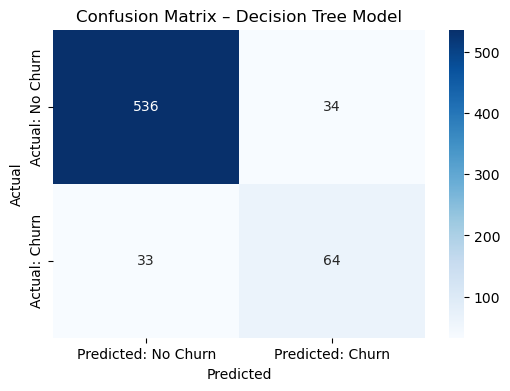

In [328]:
#### The confusion matrix below shows how well the Decision Tree model predicts customer churn.

#### *536 customers were correctly identified as not churning (true negatives)

#### *64 customers were correctly identified as churn risks (true positives)

#### *34 customers were incorrectly flagged as churn risks (false positives)

#### *33 churn customers were missed by the model (false negatives)

#### Because false negatives represent lost customers, the model prioritizes recall. 

#### The Decision Tree correctly identifies approximately 66% of customers who will churn, making it useful for proactive retention strategies despite a small number of false positives.


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted: No Churn', 'Predicted: Churn'],
    yticklabels=['Actual: No Churn', 'Actual: Churn']
)

plt.title('Confusion Matrix – Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [332]:
#Check overfitting

train_pred =tree.predict(X_train)
print("Training Recall:", recall_score(y_train, train_pred))
print("Test Recall:", recall_score(y_test, y_pred_tree))


Training Recall: 1.0
Test Recall: 0.6597938144329897


# Conclusion

### With the Decision Tree model, SyriaTel can now -Target high risk customers likely to churn through sending promotions and offers to retain them. -Deploy better customer service strategies to meet the customer needs on time -Increase customer retention and hence increase revenue retention
